## 本文主要基于朴素贝叶斯算法完成分类任务，数据集选用iris数据集。


In [16]:
import numpy as np
import pandas as pd
from scipy import stats
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split

# Load the iris dataset and return two dataframes which include training set and test set
features = ['sepal length', 'sepal width', 'petal length', 'petal width']
catagories = ['0', '1', '2']
def load_iris():
    # Load the iris dataset
    iris = datasets.load_iris()
    # Divide the training set and test set by 7:3
    x_train, x_test, y_train, y_test = train_test_split(iris['data'], iris['target'], test_size = 0.3)
    # Create a dataframe from the training set
    iris_x_train = pd.DataFrame(x_train, columns=features)
    iris_y_train = pd.DataFrame(y_train, columns=['catagories'])
    iris_train_df = iris_x_train.join(iris_y_train)
    # Create a dataframe from the test set
    iris_x_test = pd.DataFrame(x_test, columns=features)
    iris_y_test = pd.DataFrame(y_test, columns=['catagories'])
    iris_test_df = iris_x_test.join(iris_y_test)
    
    return iris_train_df, iris_test_df

In [17]:
# Load training set and test set
iris_train_df, iris_test_df = load_iris()
# View a short summary of the data set
print(iris_train_df.describe(), '\n')
print(iris_test_df.describe())

       sepal length  sepal width  petal length  petal width  catagories
count    105.000000   105.000000    105.000000   105.000000  105.000000
mean       5.885714     3.082857      3.759048     1.197143    1.009524
std        0.872929     0.434001      1.834273     0.796441    0.849154
min        4.300000     2.000000      1.100000     0.100000    0.000000
25%        5.100000     2.800000      1.500000     0.300000    0.000000
50%        5.800000     3.000000      4.400000     1.300000    1.000000
75%        6.500000     3.400000      5.200000     1.800000    2.000000
max        7.900000     4.400000      6.700000     2.500000    2.000000 

       sepal length  sepal width  petal length  petal width  catagories
count     45.000000    45.000000     45.000000    45.000000   45.000000
mean       5.744444     2.997778      3.755556     1.204444    0.977778
std        0.711770     0.439260      1.612530     0.684223    0.753443
min        4.400000     2.200000      1.000000     0.200000   

In [18]:
# Estimate parameters
def estimate_parameters(train_df, target_num):
    parameters = {}
    
    value_counts = train_df['catagories'].value_counts()
    for i in range(target_num):
        # Estimate the mean and unbiased standard deviation of each feature under a specific category
        parameters['mean' + str(i)] = train_df[train_df['catagories'] == i].mean()
        parameters['std' + str(i)] = train_df[train_df['catagories'] == i].std()
        # Estimated category prior
        parameters["catagory_prob" + str(i)] = value_counts[i] / train_df['catagories'].shape[0]
    return parameters

In [19]:
parameters = estimate_parameters(iris_train_df, 3)
print(parameters['mean1'], '\n')
print(parameters['std1'], '\n')
print(parameters['catagory_prob1'])

sepal length    6.006667
sepal width     2.746667
petal length    4.290000
petal width     1.316667
catagories      1.000000
dtype: float64 

sepal length    0.549566
sepal width     0.328773
petal length    0.438925
petal width     0.183985
catagories      0.000000
dtype: float64 

0.2857142857142857


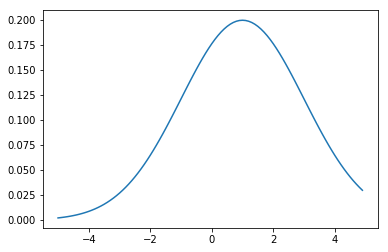

In [20]:
def calculate_gaussian_density(x ,mean, std):
    return stats.norm.pdf(x, loc=mean, scale=std)

# plot the curve of gaussian desity
x = np.arange(-5, 5, 0.1)
plt.plot(x, calculate_gaussian_density(x, 1, 2))
plt.show()

In [34]:
def predict(test_df, paramters, target_num):
    denominator = 0
    numerators = []
    for i in range(target_num):
        mean = parameters['mean' + str(i)]
        std = parameters['std' + str(i)]
        target_prob = parameters['catagory_prob' + str(i)]
               
        densities = 1
        for feature in features:
            densities = densities * calculate_gaussian_density(test_df[feature], mean[feature], std[feature])
        densities = densities * target_prob
        numerators.append(densities) 
        denominator += densities
    #print(numerators)
    #print(denominator)
    prob = pd.Series([numerator / densities for numerator in numerators], index=catagories)
    #print(prob)
    
    return None
predict(iris_test_df, parameters, 3)

[4.14939396e-02 6.11824196e-01 3.42912254e-04 7.84446206e-03
 7.70791903e-01 8.41096529e-02 5.68855111e-01 4.22698812e-01
 3.42912254e-04 3.00609592e-03 6.94434583e-14 1.15703170e+00
 1.11947703e+00 1.88172915e-02 4.22698812e-01 2.68453469e-01
 1.11947703e+00 2.40675312e-01 3.00609592e-03 7.84446206e-03
 7.02595488e-06 4.14939396e-02 7.84446206e-03 1.56725846e-01
 7.02595488e-06 1.88172915e-02 1.56725846e-01 1.15703170e+00
 8.41096529e-02 1.09928155e+00 5.68855111e-01 1.11947703e+00
 7.02595488e-06 4.22698812e-01 1.56725846e-01 1.88172915e-02
 9.60077375e-01 6.11824196e-01 1.56725846e-01 1.09928155e+00
 2.00100508e-09 3.42912254e-04 8.41096529e-02 1.88172915e-02
 1.02075969e-04]
[0.87763791 0.79761422 0.17916416 0.41406378 0.87763791 0.17916416
 0.87763791 0.01494367 0.28170265 0.41406378 0.10652411 1.03394345
 0.63929011 0.56895785 0.10652411 0.41406378 0.98523043 0.41406378
 1.03394345 0.28170265 0.73085205 0.56895785 0.56895785 0.05920811
 0.05920811 0.00678579 0.28170265 0.01494367

In [31]:
df = predict(iris_test_df, parameters, 3)
df

[array([2.58702802e-159, 1.57917322e+000, 2.77978323e-203, 8.32918441e-132,
       1.41390898e+000, 1.82647025e-186, 1.60593036e+000, 6.19882067e-088,
       2.54864817e-248, 3.21293048e-104, 0.00000000e+000, 7.41755406e-001,
       8.37445873e-003, 7.60568419e-160, 4.12708008e-104, 1.30885081e-068,
       3.78967659e-002, 3.20559356e-001, 1.99436403e-239, 2.16857684e-088,
       1.02046650e-116, 4.93347211e-107, 1.63739884e-125, 1.00033469e-186,
       2.54961599e-238, 8.94745378e-158, 5.10380212e-114, 1.02963454e-046,
       2.37381324e-002, 2.01391180e-046, 1.97794736e-002, 1.49582953e+000,
       2.20081034e-170, 2.45602577e-087, 7.52263397e-093, 3.35376327e-129,
       1.52870826e+000, 7.53532119e-002, 3.14367317e-054, 2.01186437e+000,
       8.12506509e-258, 6.14377655e-233, 1.27911642e-078, 1.25624703e-168,
       1.14697987e-195]), array([3.03875349e-03, 6.79828199e-20, 1.76705288e-04, 2.55840441e-01,
       7.94424137e-19, 5.47078714e-04, 2.79958910e-20, 1.03166648e-01,
      

,sepal length,sepal width,petal length,petal width,catagories,probs
0,5.9,3.2,4.8,1.8,1,NaN
1,5.4,3.7,1.5,0.2,0,NaN
2,6.4,2.7,5.3,1.9,2,NaN
3,6.1,2.9,4.7,1.4,1,NaN
4,4.7,3.2,1.6,0.2,0,NaN
5,5.8,2.7,5.1,1.9,2,NaN
6,4.6,3.2,1.4,0.2,0,NaN
7,5.5,2.3,4.0,1.3,1,NaN
8,6.4,2.8,5.6,2.2,2,NaN
9,6.2,2.9,4.3,1.3,1,NaN
